# Visual results (pixel-wise class predictions and model uncertainty)

## Description

In this notebook, the main results of our best model are recreated. We show the prediction of the class labels and the model uncertainty for different images in the train, validation and test datasets, as well as for other images. In order to do so, we use the method *visual_results* from the *SegNet* class which is imported in the first code line of this notebook. The "visual_results" method can take three arguments: 
1. ***dataset_type***: A string indicating the dataset type (either "TRAIN", "VAL" or "TEST"). By default it is "TEST".
2. ***images_index***: A list indicating the images indexes from the corresponding dataset. For instance, if we pass the list [0,20,47] we are requesting the prediction for the images that are found in the indexes 0, 20 and 47 of the dataset. This parameter can also be an integer value which corresponds to the number of different images that we want to display. In this case, we randomly pick the specified number of images from the corresponding dataset. By default it is set to 3.
3. ***FLAG_MAX_VOTE***: A boolean parameter indicating whether we want to use Max Voting (True) or Mean (False) at test time for the Bayesian model. By default it is set to False.


For each of the displayed images we show (1) the original image, (2) the ground truth, i.e., the given pixel labels for training the network and obtain prediction accuracies, (3) the output of our model for the given image, and (4) the uncertainty of the model prediction (the darker the color is, the more uncertain the prediction in this pixel is).

Finally, we also show the color legend for the different classes.

## Usage

In order to run this notebook you need to have the files from https://github.com/toimcio/SegNet-tensorflow in the same directory than this notebook. Moreover, you need the 'vgg16.npy' file also in the running directory, which can be found in this link: https://mega.nz/#!YU1FWJrA!O1ywiCS2IiOlUCtCpI6HTJOMrneN-Qdv3ywQP5poecM. Finally, you need to download the saved model from https://drive.google.com/drive/folders/1tD-4FsN6s8c45R81bjqIG_f5VCS1j-Db and put the downloaded folder also in the running directory. Doing so the notebook should run without any problem. If there is any problem, make sure that the file and directory paths fit the ones from the 'config.json' file.

## Imports

In [1]:
from SegNet import SegNet
from drawings_object import display_color_legend
import json
import numpy as np

In [2]:
import tensorflow as tf

## Train dataset (367 images)

No VGG path in config, so learning from scratch
False
INFO:tensorflow:Restoring parameters from ./segnet_ellipse/model.ckpt
Instructions for updating:
dim is deprecated, use axis instead
20 CamVid test images are loaded
1
(128, 128)
NON BAYES


TypeError: Invalid dimensions for image data

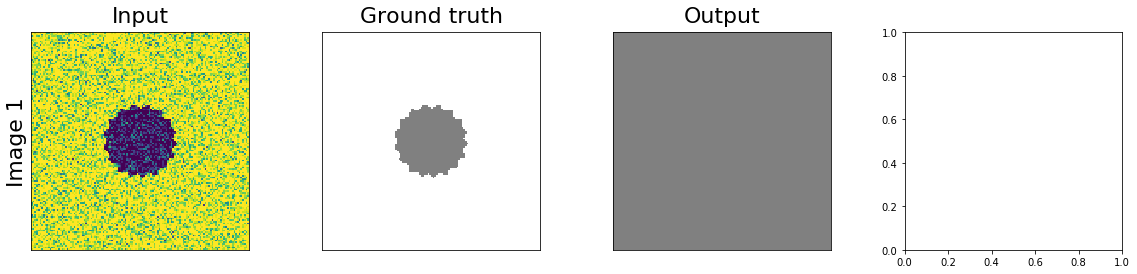

In [3]:
SegNet(conf_file="config.json").visual_results(dataset_type = "TRAIN", images_index = [2], FLAG_MAX_VOTE = False)
display_color_legend()

In [5]:
49152/128/128

3.0

In [9]:
len(a[1])

2

## Validation dataset (101 images)

VGG parameter loaded
INFO:tensorflow:Restoring parameters from ./segnet_vgg_bayes_MFL_17000/model.ckpt-17000
10 CamVid test images are loaded
10
3
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


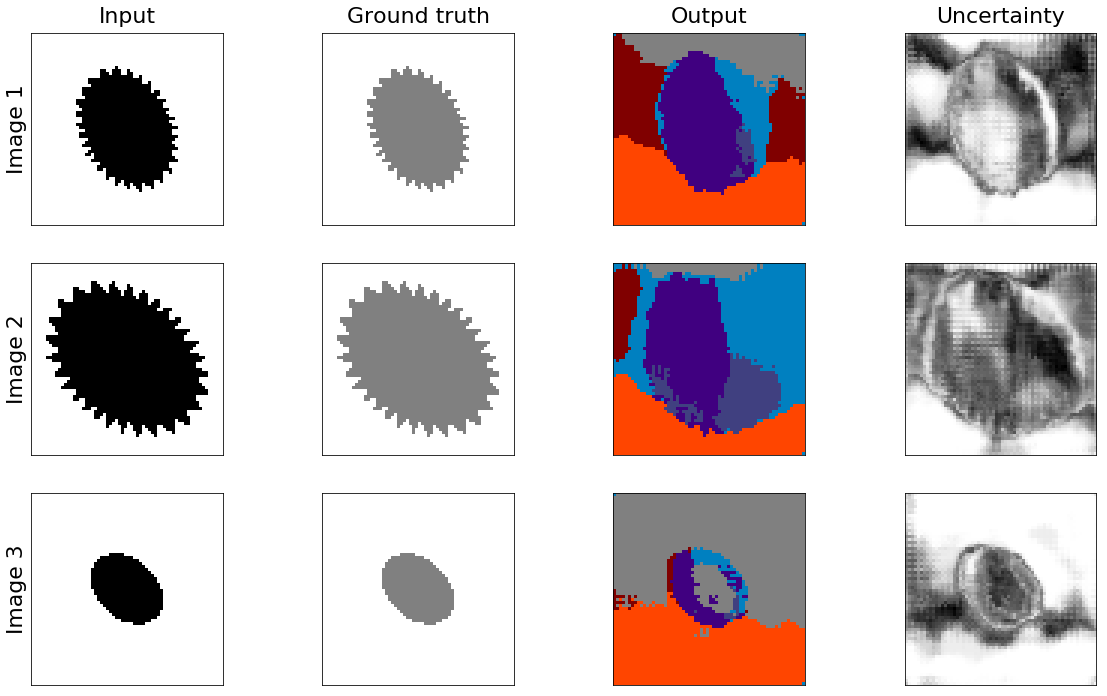

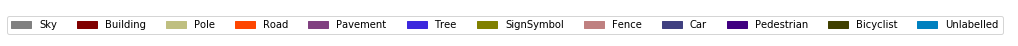

In [3]:
SegNet(conf_file="config2.json").visual_results("VAL", 3, False)
display_color_legend()

## Test dataset (233 images)

VGG parameter loaded
INFO:tensorflow:Restoring parameters from ./segnet_vgg_bayes_MFL_17000/model.ckpt-17000
233 CamVid test images are loaded


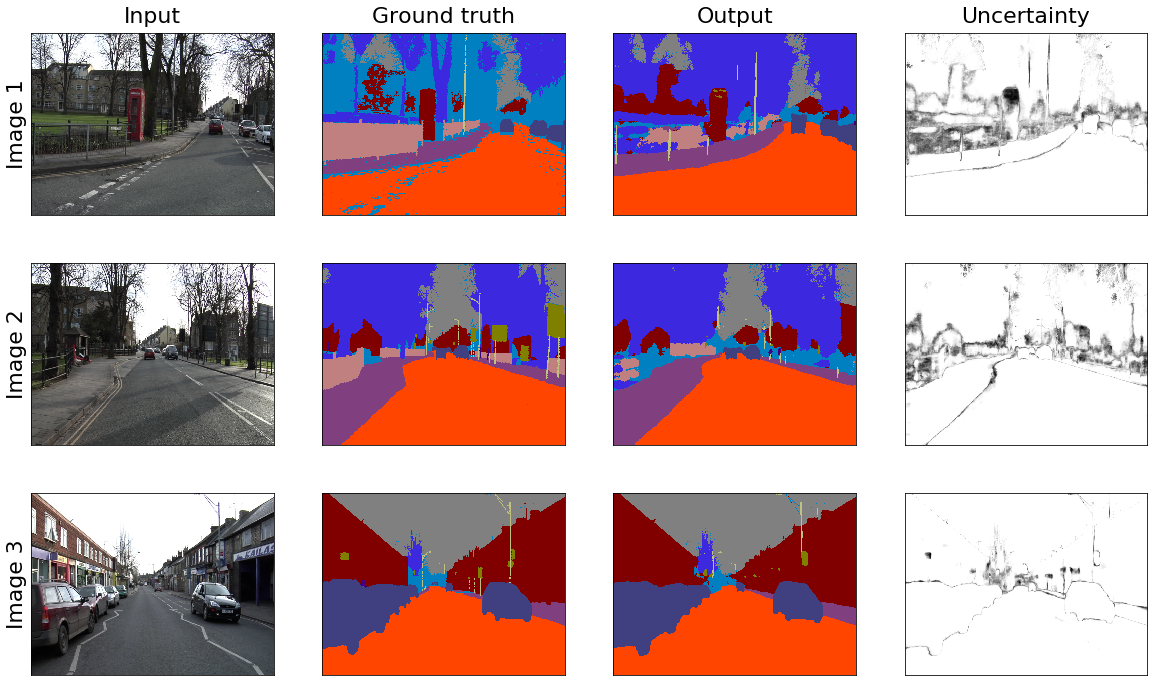

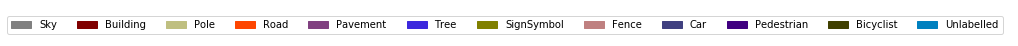

In [9]:
# Index of the image with the worst global accuracy: 62
# Index of the image with an average global accuracy: 66
# Index of the image with the best global accuracy: 198
SegNet().visual_results("TEST", [62,66,198], False)
display_color_legend()

## External images

Finally, we also show the results for external images, i.e., images that are not from any dataset. In order to do so, we use the method *visual_results_external_image* from the *SegNet* class. This method can take two arguments:
1. ***images***: a list with the different images that we want to show in numpy.ndarray format. Each of the different images must have a shape (X, X, 3), i.e., with 3 channels.
2. ***FLAG_MAX_VOTE***: A boolean parameter indicating whether we want to use Max Voting (True) or Mean (False) at test time for the Bayesian model. By default it is set to False.

As an example, we take screenshots in Google Maps (in Street View mode) of some streets in the DTU Lyngby Campus. In this case, we show the original image, the labeled output and the prediction uncertainty (there is no ground truth for obvious reasons). In this case, we also calculate the inference time for each of the images.

VGG parameter loaded
INFO:tensorflow:Restoring parameters from ./segnet_vgg_bayes_MFL_17000/model.ckpt-17000


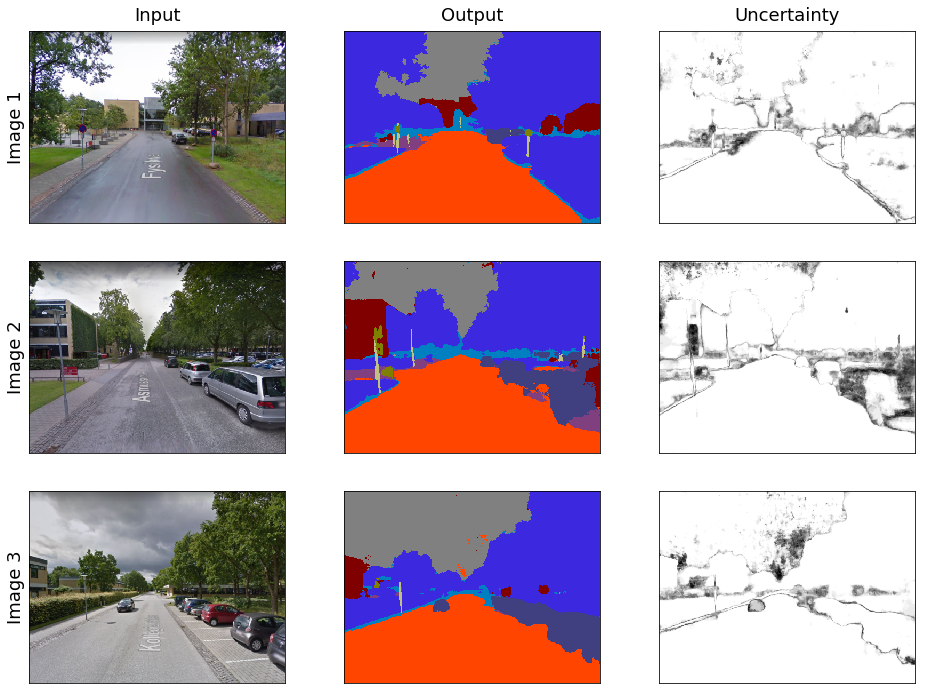

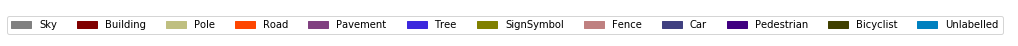

Inference time for Image 1: 27.10 seconds
Inference time for Image 2: 26.82 seconds
Inference time for Image 3: 27.42 seconds


In [5]:
from scipy import misc

images = [misc.imread('./external_images/DTU_Campus_Image1.jpg'), 
          misc.imread('./external_images/DTU_Campus_Image2.jpg'), 
          misc.imread('./external_images/DTU_Campus_Image3.jpg')]

pred_tot, var_tot, inference_time = SegNet().visual_results_external_image(images)

display_color_legend()

for t in range(len(inference_time)):
    print("Inference time for Image %d: %.2f seconds" % (t+1, inference_time[t]))

We can see that the inference time is of about 27 seconds, which corresponds to less than 1 second for each of the 30 stochastic dropout samples that we generate at test time in the Bayesian SegNet model.